
# 🧠 03 - การวิเคราะห์ข้อความเชิงสถิติ (Statistical Text Analysis)

**Chanankorn**  
*School of Informatics, Walailak University*  

---

This notebook demonstrates the fundamental processes in **Statistical Text Analysis**, including text preprocessing, statistical representation, descriptive analysis, and predictive modeling.

โน้ตบุ๊กนี้แสดงตัวอย่างกระบวนการพื้นฐานของ **การวิเคราะห์ข้อความเชิงสถิติ** ซึ่งประกอบด้วยการเตรียมข้อความ การแทนค่าข้อความเชิงสถิติ การวิเคราะห์เชิงพรรณนา และการสร้างแบบจำลองเชิงพยากรณ์


In [1]:

# 📦 Library Installation (ติดตั้งไลบรารีที่จำเป็น)
!pip install nltk wordcloud scikit-learn seaborn matplotlib pandas textblob



## 1. Text Preprocessing (การเตรียมข้อมูลข้อความ)

This section demonstrates the essential preprocessing steps for text data.  
ส่วนนี้แสดงขั้นตอนสำคัญในการเตรียมข้อมูลข้อความก่อนนำไปวิเคราะห์


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing resource

text = "Statistical text analysis involves processing and understanding text data using math and statistics."

tokens = word_tokenize(text.lower())
filtered = [w for w in tokens if w not in stopwords.words('english') and w not in string.punctuation]
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in filtered]

print("Original Tokens:", tokens)
print("After Cleaning:", lemmatized)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Original Tokens: ['statistical', 'text', 'analysis', 'involves', 'processing', 'and', 'understanding', 'text', 'data', 'using', 'math', 'and', 'statistics', '.']
After Cleaning: ['statistical', 'text', 'analysis', 'involves', 'processing', 'understanding', 'text', 'data', 'using', 'math', 'statistic']



## 2. Statistical Representation (การแทนค่าข้อความเชิงสถิติ)

We represent cleaned text as numerical vectors for further statistical or machine learning analysis.  
เราจะแทนค่าข้อความที่ผ่านการทำความสะอาดแล้วให้อยู่ในรูปแบบเชิงตัวเลขเพื่อใช้ในการวิเคราะห์


In [3]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

corpus = [
    "Artificial intelligence and machine learning are related fields.",
    "Statistical text analysis is part of natural language processing."
]

# Bag of Words
bow = CountVectorizer()
bow_matrix = bow.fit_transform(corpus)
print("BoW Vocabulary:", bow.get_feature_names_out())

# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)
print("TF-IDF Vocabulary:", tfidf.get_feature_names_out())

# N-grams
ngram_vectorizer = CountVectorizer(ngram_range=(2, 2))
ngram_matrix = ngram_vectorizer.fit_transform(corpus)
print("Bigrams:", ngram_vectorizer.get_feature_names_out())


BoW Vocabulary: ['analysis' 'and' 'are' 'artificial' 'fields' 'intelligence' 'is'
 'language' 'learning' 'machine' 'natural' 'of' 'part' 'processing'
 'related' 'statistical' 'text']
TF-IDF Vocabulary: ['analysis' 'and' 'are' 'artificial' 'fields' 'intelligence' 'is'
 'language' 'learning' 'machine' 'natural' 'of' 'part' 'processing'
 'related' 'statistical' 'text']
Bigrams: ['analysis is' 'and machine' 'are related' 'artificial intelligence'
 'intelligence and' 'is part' 'language processing' 'learning are'
 'machine learning' 'natural language' 'of natural' 'part of'
 'related fields' 'statistical text' 'text analysis']



## 3. Descriptive Statistics (การวิเคราะห์เชิงพรรณนา)

We can explore the word distribution and visualize it using word frequencies or word clouds.  
เราสามารถสำรวจการกระจายของคำและสร้างภาพด้วย Word Cloud


[('data', 3), ('text', 2), ('analysis', 1), ('machine', 1), ('learning', 1)]


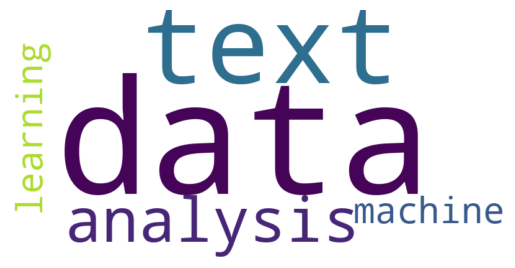

In [4]:

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = ["data", "text", "analysis", "data", "text", "machine", "learning", "data"]
freq = Counter(words)
print(freq.most_common(5))

wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()



## 4. Inferential and Predictive Analysis (การวิเคราะห์เชิงอ้างอิงและพยากรณ์)

This section demonstrates advanced text analytics methods.  
ส่วนนี้แสดงเทคนิคขั้นสูงสำหรับการวิเคราะห์ข้อความ


In [5]:

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

documents = [
    "Machine learning improves predictive analytics.",
    "Deep learning is part of artificial intelligence.",
    "Statistical models help in natural language processing."
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])


Topic 0:
['machine', 'improves', 'analytics', 'predictive', 'learning']
Topic 1:
['in', 'language', 'models', 'statistical', 'processing']


In [6]:

from textblob import TextBlob

texts = ["I love this product!", "This is the worst experience ever."]
for t in texts:
    sentiment = TextBlob(t).sentiment.polarity
    print(f"'{t}' → Sentiment Score: {sentiment}")


'I love this product!' → Sentiment Score: 0.625
'This is the worst experience ever.' → Sentiment Score: -1.0


In [7]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

texts = [
    "Artificial intelligence and machine learning",
    "Statistical analysis in data science",
    "Deep learning for NLP applications",
    "Predictive modeling and statistics"
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

for i, label in enumerate(kmeans.labels_):
    print(f"Text: {texts[i]} → Cluster: {label}")


Text: Artificial intelligence and machine learning → Cluster: 1
Text: Statistical analysis in data science → Cluster: 0
Text: Deep learning for NLP applications → Cluster: 1
Text: Predictive modeling and statistics → Cluster: 1



## 5. Case Study: Spam Detection (กรณีศึกษา – การตรวจจับข้อความสแปม)

This section demonstrates a basic spam classifier using TF-IDF and Naïve Bayes.  
ส่วนนี้สาธิตการจำแนกข้อความสแปมโดยใช้ TF-IDF และ Naïve Bayes


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

         ham       0.33      1.00      0.50         1
        spam       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



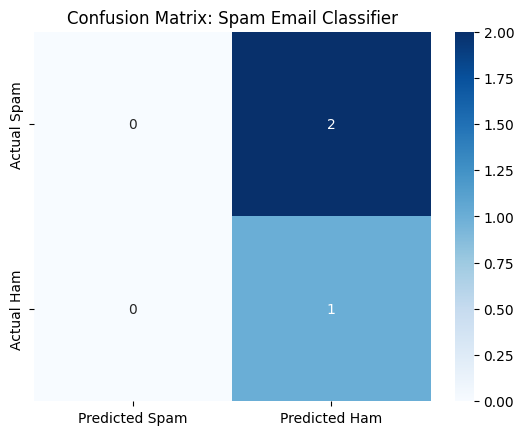

In [9]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')

data = {
    'label': ['spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam'],
    'text': [
        "Congratulations! You won a free iPhone. Click here to claim now!",
        "Hi John, can we reschedule our meeting tomorrow?",
        "Your Amazon order has been shipped successfully.",
        "Limited offer! Get a $1000 cash prize. Visit our website today!",
        "Lunch at 12:30? Let me know your preference.",
        "Earn money from home!!! Exclusive deal inside!!!",
        "Reminder: Your report is due by Monday.",
        "You’ve been selected for a free vacation trip to Hawaii!"
    ]
}
df = pd.DataFrame(data)

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.3, random_state=42)

tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=['spam', 'ham'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Spam', 'Predicted Ham'],
            yticklabels=['Actual Spam', 'Actual Ham'])
plt.title("Confusion Matrix: Spam Email Classifier")
plt.show()


## 6. Conclusion (สรุป)

This notebook demonstrated the key steps of **Statistical Text Analysis**, from preprocessing to prediction.  
โน้ตบุ๊กนี้แสดงขั้นตอนสำคัญของการวิเคราะห์ข้อความเชิงสถิติ ตั้งแต่การเตรียมข้อมูลจนถึงการสร้างแบบจำลองพยากรณ์
